# Combining MSR, Meteoschweiz, Omega data and plotting them

In [121]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
#from matplotlib.dates import DateFormatter
import numpy as np

In [122]:
#check which is the current working directory
os.getcwd()

'/Users/dtg1/MeineDokumente/BFH/013_Python/RHTData/00_Alldata'

In [123]:
#if necessary, change directory
#os.chdir('00_Alldata')
#os.getcwd()

## Import csv data from the MRS dataloggers

In [124]:
#import csv file with MRS data
df = pd.read_csv('MRS_Georg_Laurenz.csv', header=[0], sep=',')

In [125]:
#checking how many rows and columns
df.shape

(76875, 18)

In [126]:
#checking the names of columns
df.columns

Index(['date_Georg_W', 'RH_Georg_W', 'T_Georg_W', 'date_Georg_RS',
       'RH_Georg_RS', 'T_Georg_RS', 'date_Georg_G', 'RH_Georg_G', 'T_Georg_G',
       'date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W', 'date_LaurenzRS',
       'RH_Laurenz_RS', 'T_Laurenz_RS', 'date_Laurenz_G', 'RH_Laurenz_G',
       'T_Laurenz_G'],
      dtype='object')

In [127]:
#renaming columns 
df.rename(columns={"date_LaurenzRS": "date_Laurenz_RS"}, inplace=True)
df.columns

Index(['date_Georg_W', 'RH_Georg_W', 'T_Georg_W', 'date_Georg_RS',
       'RH_Georg_RS', 'T_Georg_RS', 'date_Georg_G', 'RH_Georg_G', 'T_Georg_G',
       'date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W', 'date_Laurenz_RS',
       'RH_Laurenz_RS', 'T_Laurenz_RS', 'date_Laurenz_G', 'RH_Laurenz_G',
       'T_Laurenz_G'],
      dtype='object')

In [128]:
df

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,RH_Laurenz_W,T_Laurenz_W,date_Laurenz_RS,RH_Laurenz_RS,T_Laurenz_RS,date_Laurenz_G,RH_Laurenz_G,T_Laurenz_G
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,41.8,6.9,2021-12-14 11:00:00.049,39.1,7.3,2021-12-14 11:00:00.057,42.8,7.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,57.1,5.7,2021-12-14 11:10:00.049,63.0,7.4,2021-12-14 11:10:00.057,60.8,7.1
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,60.9,5.0,2021-12-14 11:20:00.049,56.5,6.8,2021-12-14 11:20:00.057,62.4,6.4
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,48.6,5.6,2021-12-14 11:30:00.049,62.8,6.6,2021-12-14 11:30:00.057,67.7,9.5
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,59.8,5.3,2021-12-14 11:40:00.049,65.9,7.6,2021-12-14 11:40:00.057,64.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76870,2023-06-01 10:40:00.047,48.4,21.6,2023-06-01 10:20:00.049,53.8,21.3,2023-06-01 10:10:00.055,54.0,21.2,2023-06-01 09:40:00.049,50.4,22.9,2023-06-01 09:40:00.049,51.0,22.6,2023-06-01 09:40:00.045,51.0,22.3
76871,2023-06-01 10:50:00.047,47.3,21.6,2023-06-01 10:30:00.049,52.8,21.3,2023-06-01 10:20:00.055,53.5,21.2,2023-06-01 09:50:00.049,51.5,24.5,2023-06-01 09:50:00.049,48.5,23.2,2023-06-01 09:50:00.045,51.4,22.9
76872,2023-06-01 11:00:00.047,46.7,21.7,2023-06-01 10:40:00.049,52.1,21.5,2023-06-01 10:30:00.055,52.8,21.3,2023-06-01 10:00:00.049,52.0,21.9,2023-06-01 10:00:00.049,52.1,21.1,2023-06-01 10:00:00.045,51.5,21.6
76873,2023-06-01 11:10:00.047,46.0,21.9,2023-06-01 10:50:00.049,51.4,21.5,2023-06-01 10:40:00.055,52.2,21.4,2023-06-01 10:10:00.049,52.6,21.3,2023-06-01 10:10:00.049,52.7,21.2,2023-06-01 10:10:00.045,52.3,21.3


It is a bit silly and I should change the program that reads the datas from the dataloggers but necessary:
I need to create a single dataframe that has a single time column, which is also the index of the dataframe. To do this I need to create dataframes that have as index their respective time serie. The I have to create a time serie from the first to the last possible time, and finally join the dataframes.  

In [176]:
# the dates in the df dataframe are actually strings and I need to replace them with datetime object, I also remove the microseconds.

import re

def changedate(date_string):
    date_format = '%Y-%m-%d %H:%M:%S'
    pattern_1 = r'^\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d+$'
    pattern_2 = r'^\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}$'
    
    if re.match(pattern_1, date_string):
        return datetime.strptime(date_string[:-4],date_format)        
    
    elif re.match(pattern_2, date_string):
        return datetime.strptime(date_string,date_format)
    else:
        return date_string
    

In [177]:
# I first slice the df dataframes for the columns relative to one datalogger, 
#then I change the dates to datetime objects, and finally
#set these columns as indexes
df_georg_w = df.loc[:,['date_Georg_W', 'RH_Georg_W', 'T_Georg_W']]
df_georg_w['date_Georg_W']=df_georg_w['date_Georg_W'].map(changedate)
df_georg_w=df_georg_w.set_index('date_Georg_W')
df_georg_w

,RH_Georg_W,T_Georg_W
date_Georg_W,,
2021-12-14 11:00:00,42.3,6.1
2021-12-14 11:10:00,60.0,4.8
2021-12-14 11:20:00,62.7,4.7
2021-12-14 11:30:00,64.8,4.7
2021-12-14 11:40:00,64.9,4.8
...,...,...
2023-06-01 10:40:00,48.4,21.6
2023-06-01 10:50:00,47.3,21.6
2023-06-01 11:00:00,46.7,21.7


In [135]:
df_georg_rs = df.loc[:,['date_Georg_RS', 'RH_Georg_RS', 'T_Georg_RS']]
df_georg_rs['date_Georg_RS']=df_georg_rs['date_Georg_RS'].map(changedate)
df_georg_rs=df_georg_rs.set_index('date_Georg_RS')
df_georg_rs

,RH_Georg_RS,T_Georg_RS
date_Georg_RS,,
2021-12-14 11:00:00,43.6,6.7
2021-12-14 11:10:00,59.6,5.3
2021-12-14 11:20:00,62.8,4.8
2021-12-14 11:30:00,65.1,4.7
2021-12-14 11:40:00,65.6,4.7
...,...,...
2023-06-01 10:20:00,53.8,21.3
2023-06-01 10:30:00,52.8,21.3
2023-06-01 10:40:00,52.1,21.5


In [136]:
df_georg_g = df.loc[:,['date_Georg_G', 'RH_Georg_G', 'T_Georg_G']]
df_georg_g['date_Georg_G']=df_georg_g['date_Georg_G'].map(changedate)
df_georg_g=df_georg_g.set_index('date_Georg_G')
df_georg_g

,RH_Georg_G,T_Georg_G
date_Georg_G,,
2021-12-14 11:00:00,42.8,6.9
2021-12-14 11:10:00,61.1,5.1
2021-12-14 11:20:00,64.2,4.7
2021-12-14 11:30:00,65.5,4.6
2021-12-14 11:40:00,66.4,4.6
...,...,...
2023-06-01 10:10:00,54.0,21.2
2023-06-01 10:20:00,53.5,21.2
2023-06-01 10:30:00,52.8,21.3


In [137]:
df_laurenz_w = df.loc[:,['date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W']]
df_laurenz_w['date_Laurenz_W']=df_laurenz_w['date_Laurenz_W'].map(changedate)
df_laurenz_w=df_laurenz_w.set_index('date_Laurenz_W')
df_laurenz_w

,RH_Laurenz_W,T_Laurenz_W
date_Laurenz_W,,
2021-12-14 11:00:00,41.8,6.9
2021-12-14 11:10:00,57.1,5.7
2021-12-14 11:20:00,60.9,5.0
2021-12-14 11:30:00,48.6,5.6
2021-12-14 11:40:00,59.8,5.3
...,...,...
2023-06-01 09:40:00,50.4,22.9
2023-06-01 09:50:00,51.5,24.5
2023-06-01 10:00:00,52.0,21.9


In [138]:
df_laurenz_rs = df.loc[:,['date_Laurenz_RS', 'RH_Laurenz_RS', 'T_Laurenz_RS']]
df_laurenz_rs['date_Laurenz_RS']=df_laurenz_rs['date_Laurenz_RS'].map(changedate)
df_laurenz_rs=df_laurenz_rs.set_index('date_Laurenz_RS')
df_laurenz_rs

,RH_Laurenz_RS,T_Laurenz_RS
date_Laurenz_RS,,
2021-12-14 11:00:00,39.1,7.3
2021-12-14 11:10:00,63.0,7.4
2021-12-14 11:20:00,56.5,6.8
2021-12-14 11:30:00,62.8,6.6
2021-12-14 11:40:00,65.9,7.6
...,...,...
2023-06-01 09:40:00,51.0,22.6
2023-06-01 09:50:00,48.5,23.2
2023-06-01 10:00:00,52.1,21.1


In [139]:
df_laurenz_g = df.loc[:,['date_Laurenz_G', 'RH_Laurenz_G', 'T_Laurenz_G']]
df_laurenz_g['date_Laurenz_G']=df_laurenz_g['date_Laurenz_G'].map(changedate)
df_laurenz_g=df_laurenz_g.set_index('date_Laurenz_G')
df_laurenz_g

,RH_Laurenz_G,T_Laurenz_G
date_Laurenz_G,,
2021-12-14 11:00:00,42.8,7.5
2021-12-14 11:10:00,60.8,7.1
2021-12-14 11:20:00,62.4,6.4
2021-12-14 11:30:00,67.7,9.5
2021-12-14 11:40:00,64.0,7.9
...,...,...
2023-06-01 09:40:00,51.0,22.3
2023-06-01 09:50:00,51.4,22.9
2023-06-01 10:00:00,51.5,21.6


## Import csv file with data from meteoschweiz

In [179]:
#import csv file with ms data
df_out=pd.read_csv('RHTout.csv', header=[0], sep=',')

In [180]:
df_out.shape
df_out

,T out,RH out,DP out,a
0,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...
77035,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 23:40:00,14.9,83.8,12.2


In [181]:
df_out.rename(columns={"T out": "time out","RH out":"T out", "DP out": "RH out","a":"DP out"}, inplace=True)
df_out

,time out,T out,RH out,DP out
0,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...
77035,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 23:40:00,14.9,83.8,12.2


In [182]:
df_out['time out']=df_out['time out'].map(changedate)
df_out=df_out.set_index('time out')
df_out

,T out,RH out,DP out
time out,,,
2021-12-14 00:00:00,1.7,98.4,1.5
2021-12-14 00:10:00,1.5,97.7,1.2
2021-12-14 00:20:00,1.6,97.8,1.3
2021-12-14 00:30:00,1.4,98.6,1.2
2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...
2023-06-01 23:10:00,15.0,83.7,12.3
2023-06-01 23:20:00,15.0,83.0,12.1
2023-06-01 23:30:00,15.0,83.2,12.2


## Import data from the Omega datalogger

In [160]:
#import csv file with omega data
df_room=pd.read_csv('RHT_room.csv', header=[0], sep=',')

In [161]:
print(df_room.shape)
df_room.rename(columns={"temperature room": "T room"}, inplace=True)
print(df_room.at[0,"time room"],type(df_room.at[0,"time room"]))
df_room

(44205, 4)
2021-12-14 11:10:00 <class 'str'>


,time room,T room,RH room,DP room
0,2021-12-14 11:10:00,7.44044,54.4134,-1.166690
1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034
2,2021-12-14 11:30:00,6.86129,58.0450,-0.825118
3,2021-12-14 11:40:00,6.77549,58.9376,-0.696661
4,2021-12-14 11:50:00,6.76476,59.9065,-0.482998
...,...,...,...,...
44200,2022-10-17 12:40:00,16.22430,73.0291,11.384200
44201,2022-10-17 12:50:00,16.28860,72.8994,11.419300
44202,2022-10-17 13:00:00,16.49240,73.2198,11.681900
44203,2022-10-17 13:10:00,17.13590,71.3354,11.905500


In [162]:
df_room['time room']=df_room['time room'].map(changedate2)
df_room=df_room.set_index('time room')
df_room

,T room,RH room,DP room
time room,,,
2021-12-14 11:10:00,7.44044,54.4134,-1.166690
2021-12-14 11:20:00,7.06507,56.5420,-0.993034
2021-12-14 11:30:00,6.86129,58.0450,-0.825118
2021-12-14 11:40:00,6.77549,58.9376,-0.696661
2021-12-14 11:50:00,6.76476,59.9065,-0.482998
...,...,...,...
2022-10-17 12:40:00,16.22430,73.0291,11.384200
2022-10-17 12:50:00,16.28860,72.8994,11.419300
2022-10-17 13:00:00,16.49240,73.2198,11.681900


## Create  a serie of datetime values from the first possible to the last, this will be the index of my combined dataframe

In [163]:
# Create a serie of datetime values from the first possible to the last possible with intervals of 10 minutes

min_time=datetime(2021,12,14,0,0)
max_time=datetime(2023,6,1,23,50)
time_range = pd.date_range(min_time, max_time, freq='10 min')
time_range

DatetimeIndex(['2021-12-14 00:00:00', '2021-12-14 00:10:00',
               '2021-12-14 00:20:00', '2021-12-14 00:30:00',
               '2021-12-14 00:40:00', '2021-12-14 00:50:00',
               '2021-12-14 01:00:00', '2021-12-14 01:10:00',
               '2021-12-14 01:20:00', '2021-12-14 01:30:00',
               ...
               '2023-06-01 22:20:00', '2023-06-01 22:30:00',
               '2023-06-01 22:40:00', '2023-06-01 22:50:00',
               '2023-06-01 23:00:00', '2023-06-01 23:10:00',
               '2023-06-01 23:20:00', '2023-06-01 23:30:00',
               '2023-06-01 23:40:00', '2023-06-01 23:50:00'],
              dtype='datetime64[ns]', length=77040, freq='10T')

In [164]:
# transforming the created time serie in a dataframe whose index is this time serie
df_time = pd.DataFrame(time_range).set_index(0)
df_time

""
0
2021-12-14 00:00:00
2021-12-14 00:10:00
2021-12-14 00:20:00
2021-12-14 00:30:00
2021-12-14 00:40:00
...
2023-06-01 23:10:00
2023-06-01 23:20:00
2023-06-01 23:30:00


## Joining the dataframes with a single time serie, which is the index

In [167]:
#joining the dataframes. it is important to use the method join and place the timeserie I want to use as index as first
# first I create a list of all dataframes to be joined, with the timeserie index as first element

dfs=[df_time,df_georg_w,df_georg_rs,df_georg_g,df_laurenz_w,df_laurenz_rs,df_laurenz_g,df_room,df_out]

# then I join all dataframes to the first one

df_f=dfs[0].join(dfs[1:])
#df_f
df_f.iloc[100:200,:]

,RH_Georg_W,T_Georg_W,RH_Georg_RS,T_Georg_RS,RH_Georg_G,T_Georg_G,RH_Laurenz_W,T_Laurenz_W,RH_Laurenz_RS,T_Laurenz_RS,RH_Laurenz_G,T_Laurenz_G,T room,RH room,DP room,T out,RH out,DP out
0,,,,,,,,,,,,,,,,,,
2021-12-14 16:40:00,75.2,4.1,57.7,4.8,59.5,4.6,80.4,3.2,78.3,3.5,75.5,4.0,4.57684,68.8329,-0.656192,1.8,98.0,1.5
2021-12-14 16:50:00,74.9,3.9,57.7,4.6,59.4,4.5,80.3,3.2,78.2,3.4,75.5,3.9,4.39452,69.2144,-0.755183,1.8,98.5,1.6
2021-12-14 17:00:00,74.6,3.8,57.6,4.4,59.4,4.3,80.3,3.1,78.1,3.3,75.5,3.8,4.25509,69.6493,-0.803100,1.8,98.7,1.6
2021-12-14 17:10:00,74.4,3.7,57.6,4.3,59.3,4.2,80.3,3.1,78.0,3.3,75.5,3.7,4.14784,69.9315,-0.850636,1.8,98.6,1.6
2021-12-14 17:20:00,74.2,3.6,57.6,4.2,59.2,4.1,80.2,3.1,78.0,3.2,75.5,3.6,4.05131,70.1833,-0.894115,1.9,98.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-15 08:30:00,76.0,2.5,56.1,2.6,57.5,2.4,77.9,2.5,77.8,2.1,76.4,2.3,2.44255,74.2650,-1.672950,2.0,99.2,1.9
2021-12-15 08:40:00,76.0,2.5,56.1,2.6,57.5,2.4,77.9,2.5,77.8,2.1,76.4,2.2,2.44255,74.2650,-1.672950,2.0,99.3,1.9
2021-12-15 08:50:00,76.0,2.5,56.1,2.6,57.5,2.4,78.0,2.5,77.8,2.1,76.4,2.2,2.44255,74.2650,-1.672950,2.1,99.3,2.0


## Plotting the data with matplotlib

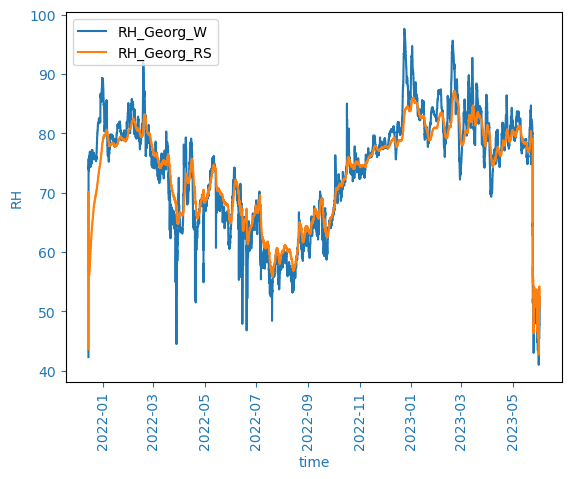

Duration: 0:00:00.108208


In [203]:
start_time = datetime.now()

x_0=df_f.index
y_1=df_f['RH_Georg_W']
y_2=df_f['RH_Georg_RS']

fig,ax=plt.subplots()


ax.plot(x_0, y_1, color="C0")
ax.plot(x_0, y_2, color="C1")

ax.set_xlabel("time", color="C0")
ax.set_ylabel("RH", color="C0")

ax.tick_params(axis='x', colors="C0",labelrotation=90)
ax.tick_params(axis='y', colors="C0")

ax.legend(('RH_Georg_W','RH_Georg_RS'),loc='upper left')

# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels)

plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

# Methods used in previous versions that can be useful in the future
## Getting rid of NaN
It is important to get rid of NaN otherwise the series cannot be plotted. The date columns have to retain a date format, while the other values can be set to zero

In [200]:
#slicing df_all for all MSR dates that are NaN
#df_all.loc[df_all['date_Georg_W'].isna(),:]

In [201]:
# Look at the syntax!! I redefine the values of the cells by slicing for all the MSR date rows that are NaN
# -actually only the date row for Georg_W but they are all similar, so it works
# and by setting for all the rows of the list of columns name a certain value= the last recorded value
# This is necessary to avoid problems when I plot the data: NaN values cannot be plotted and the date
# columns have to retain a date format

#df_all.loc[df_all['date_Georg_W'].isna(),['date_Georg_W','date_Georg_RS','date_Georg_G','date_Laurenz_W','date_Laurenz_RS','date_Laurenz_G']] = '2023-06-01 11:20:00.047'
#df_all

In [202]:
# Now I substitute all remaining NaN values with 0 with the function fillna

#df_all=df_all.fillna(0)
#df_all

## trying to have control on ticks

In [204]:
'''
xtickslabels=[]
for i in range(14):
    item=subset.iloc[i][:16]
    xtickslabels.append(item)
print(xtickslabels,"length is: " ,len(xtickslabels))
'''

'\nxtickslabels=[]\nfor i in range(14):\n    item=subset.iloc[i][:16]\n    xtickslabels.append(item)\nprint(xtickslabels,"length is: " ,len(xtickslabels))\n'

Just to show that it is also possible to use list comprehension

In [205]:
'''
xtickslabels=[subset.iloc[i][:16]for i in range(14)]
print(xtickslabels,"length is: " ,len(xtickslabels))
'''

'\nxtickslabels=[subset.iloc[i][:16]for i in range(14)]\nprint(xtickslabels,"length is: " ,len(xtickslabels))\n'

In [39]:
# xtickspos = print(list(range(6,1001,72)))

[6, 78, 150, 222, 294, 366, 438, 510, 582, 654, 726, 798, 870, 942]
